<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - MVP - Savio Reis
## Classificador de Carros

## Configuração do ambiente

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

O dataset Car Evaluation foi derivado de um modelo hierárquico de decisão e avalia a aceitabilidade de carros com base em 6 atributos categóricos: preço de compra, custo de manutenção, número de portas, capacidade de pessoas, tamanho do porta-malas e segurança. Ele é usado principalmente para tarefas de classificação e pode ajudar no desenvolvimento de sistemas de recomendação e análise de estruturas de decisão.

Descrição de Cada Coluna

- buying: Preço de compra
- maint: Custo de manutenção
- doors: Número de portas
- persons: Capacidade em termos de número de pessoas
- lug_boot: Tamanho do porta-malas
- safety: Estimativa de segurança do carro
- class: Nível de avaliação (inaceitável, aceitável, bom, muito bom)

O objetivo é prever se um veículo será uma boa opção para a compra ou não baseado nas características listadas acima.

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Savio-Reis/MVP---Sistemas-Inteligentes/refs/heads/main/dataset_car.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,result
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   result    1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [4]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.853858 (0.017771)
KNN: 0.954416 (0.015200)
CART: 0.978287 (0.011678)
NB: 0.769221 (0.031252)
SVM: 0.940689 (0.016016)
Bagging: 0.981180 (0.012636)
RF: 0.981905 (0.012655)
ET: 0.980476 (0.009152)
Ada: 0.840111 (0.022364)
GB: 0.988421 (0.009829)
Voting: 0.955161 (0.012731)


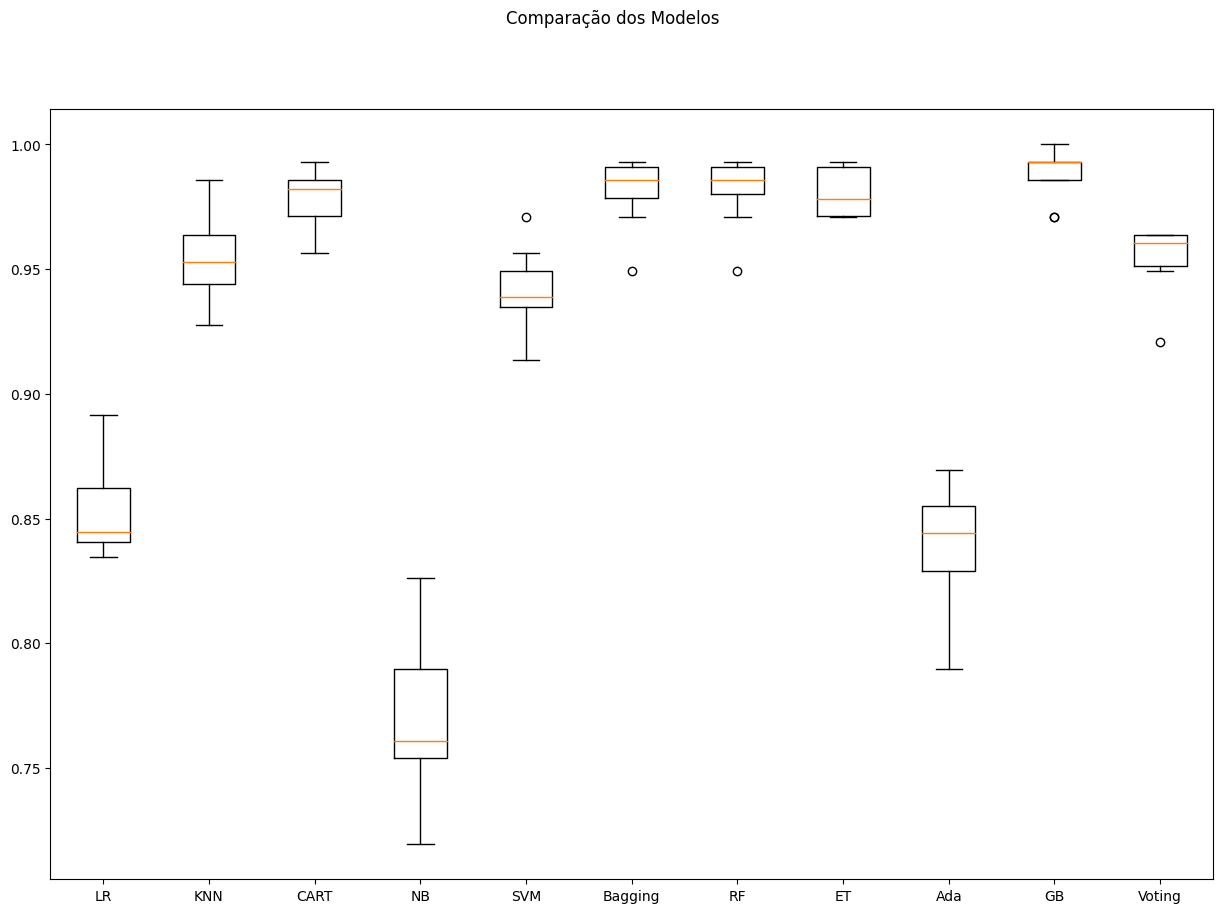

In [5]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$


onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

LR-orig: 0.854 (0.018)
KNN-orig: 0.954 (0.015)
CART-orig: 0.978 (0.012)
NB-orig: 0.769 (0.031)
SVM-orig: 0.941 (0.016)
Bag-orig: 0.981 (0.013)
RF-orig: 0.982 (0.013)
ET-orig: 0.980 (0.009)
Ada-orig: 0.840 (0.022)
GB-orig: 0.988 (0.010)
Vot-orig: 0.955 (0.013)
LR-padr: 0.855 (0.019)
KNN-padr: 0.970 (0.013)
CART-padr: 0.978 (0.011)
NB-padr: 0.766 (0.030)
SVM-padr: 0.962 (0.014)
Bag-padr: 0.981 (0.014)
RF-padr: 0.982 (0.013)
ET-padr: 0.978 (0.009)
Ada-padr: 0.840 (0.022)
GB-padr: 0.989 (0.009)
Vot-padr: 0.973 (0.011)
LR-norm: 0.842 (0.017)
KNN-norm: 0.966 (0.011)
CART-norm: 0.978 (0.011)
NB-norm: 0.766 (0.030)
SVM-norm: 0.961 (0.012)
Bag-norm: 0.980 (0.014)
RF-norm: 0.983 (0.010)
ET-norm: 0.977 (0.010)
Ada-norm: 0.840 (0.022)
GB-norm: 0.988 (0.010)
Vot-norm: 0.968 (0.013)


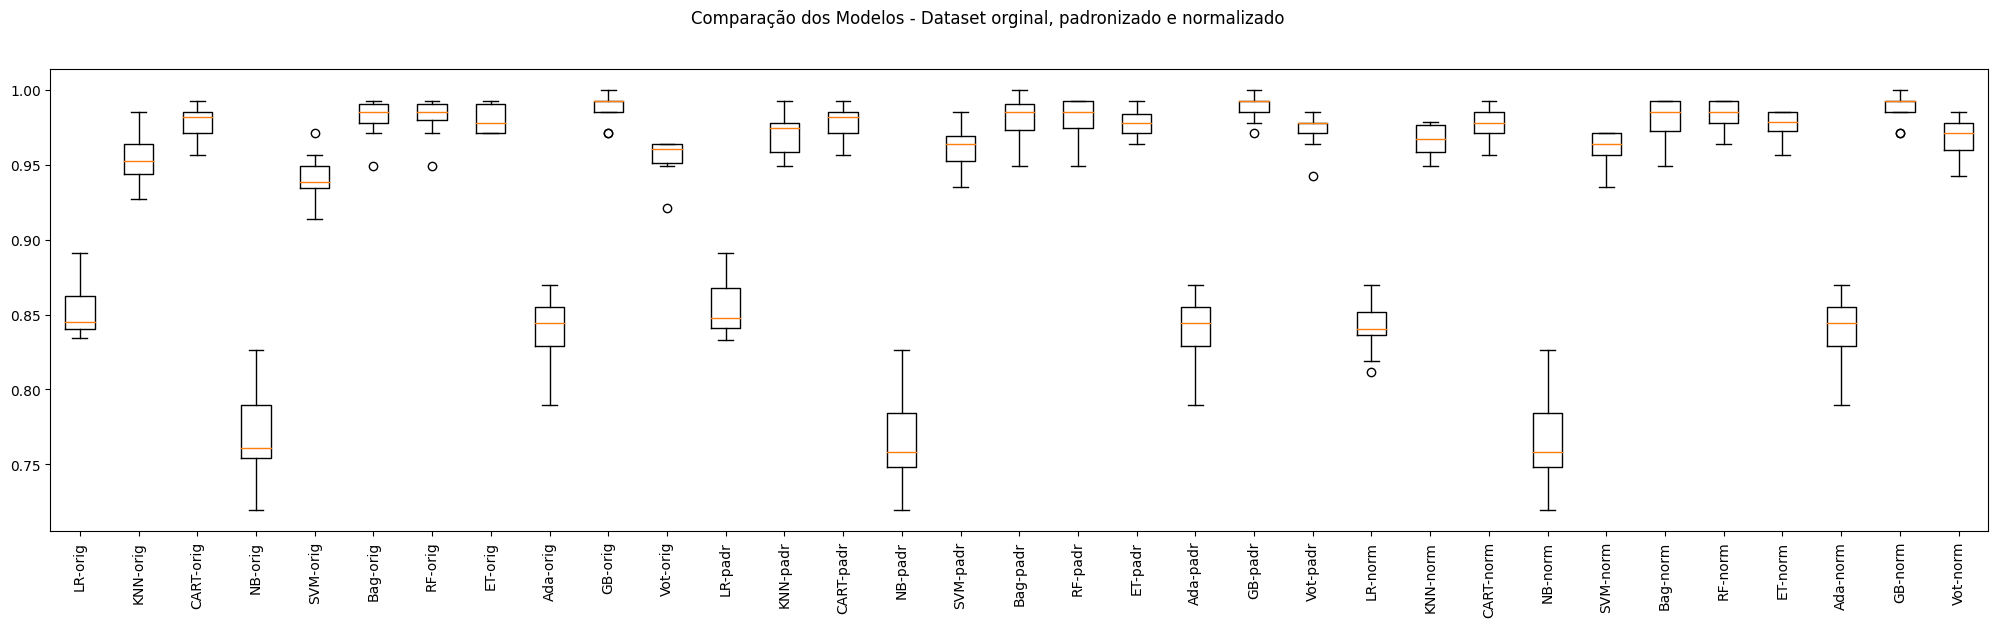

In [6]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [7]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))



Modelo: LR-orig - Melhor: 0.848051 usando {'LR__C': 1, 'LR__solver': 'saga'}
Modelo: LR-padr - Melhor: 0.853846 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.853121 usando {'LR__C': 100, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.949346 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Modelo: KNN-padr - Melhor: 0.968896 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Modelo: KNN-norm - Melhor: 0.961667 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: CART-orig - Melhor: 0.978287 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-padr - Melhor: 0.980458 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.979734 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor: 0.814058 usando {'NB__var_smoothing': 1e-05}
Modelo: NB-padr - Melhor

In [8]:
# Modelo: LR-orig - Melhor: 0.848051 usando {'LR__C': 1, 'LR__solver': 'saga'}
# Modelo: LR-padr - Melhor: 0.853846 usando {'LR__C': 100, 'LR__solver': 'saga'}
# Modelo: LR-norm - Melhor: 0.853121 usando {'LR__C': 100, 'LR__solver': 'saga'}
# Modelo: KNN-orig - Melhor: 0.949346 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
# Modelo: KNN-padr - Melhor: 0.968896 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
# Modelo: KNN-norm - Melhor: 0.961667 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
# Modelo: CART-orig - Melhor: 0.978287 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
# Modelo: CART-padr - Melhor: 0.980458 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
# Modelo: CART-norm - Melhor: 0.979734 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
# Modelo: NB-orig - Melhor: 0.814058 usando {'NB__var_smoothing': 1e-05}
# Modelo: NB-padr - Melhor: 0.805371 usando {'NB__var_smoothing': 1e-05}
# Modelo: NB-norm - Melhor: 0.805371 usando {'NB__var_smoothing': 1e-05}
# Modelo: SVM-orig - Melhor: 0.983352 usando {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: SVM-padr - Melhor: 0.985526 usando {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: SVM-norm - Melhor: 0.990593 usando {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}
# Modelo: Bagging-orig - Melhor: 0.976838 usando {}
# Modelo: Bagging-padr - Melhor: 0.975391 usando {}
# Modelo: Bagging-norm - Melhor: 0.976843 usando {}
# Modelo: RF-orig - Melhor: 0.984089 usando {'RF__max_depth': 30, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
# Modelo: RF-padr - Melhor: 0.981915 usando {'RF__max_depth': None, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
# Modelo: RF-norm - Melhor: 0.982635 usando {'RF__max_depth': 30, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 100}
# Modelo: ET-orig - Melhor: 0.981913 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
# Modelo: ET-padr - Melhor: 0.983359 usando {'ET__max_depth': 20, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
# Modelo: ET-norm - Melhor: 0.981913 usando {'ET__max_depth': 20, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 200}
# Modelo: Ada-orig - Melhor: 0.853840 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 10}
# Modelo: Ada-padr - Melhor: 0.853840 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 10}
# Modelo: Ada-norm - Melhor: 0.853840 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 10}
# Modelo: GB-orig - Melhor: 0.995660 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 100}
# Modelo: GB-padr - Melhor: 0.995660 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 100}
# Modelo: GB-norm - Melhor: 0.995660 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 100}
# Modelo: Voting-orig - Melhor: 0.948632 usando {}
# Modelo: Voting-padr - Melhor: 0.965272 usando {}

In [10]:
# Tuning do GB

np.random.seed(7) # definindo uma semente global para este bloco
num_trees = 100

pipelines = []

# Definindo os componentes do pipeline
gb = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[gb])))
pipelines.append(('GB-padr', Pipeline(steps=[standard_scaler, gb])))
pipelines.append(('GB-norm', Pipeline(steps=[min_max_scaler, gb])))

param_grid = {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: GB-orig - Melhor: 0.995660 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-padr - Melhor: 0.995660 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 100}
Sem tratamento de missings: GB-norm - Melhor: 0.995660 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 100}


## Finalização do Modelo

In [12]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
#Modelo: GB-norm - Melhor: 0.995660 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 3, 'GB__n_estimators': 100}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = GradientBoostingClassifier(learning_rate=0.2,
                                  max_depth=3,
                                  n_estimators=100)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9971098265895953


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [13]:
np.random.seed(7)

model = GradientBoostingClassifier(learning_rate=0.2,
                                  max_depth=3,
                                  n_estimators=100)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('GB', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9971098265895953


## Salvando os arquivos

In [14]:
# Salvando o modelo
model_filename = 'gb_car_classifier.pkl'
with open("/content/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_car.pkl'
with open("/content/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'gb_car_pipeline.pkl'
with open("/content/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("/content/X_test_dataset_car.csv", index=False)
y_test_df.to_csv("/content/y_test_dataset_car.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [15]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

GradientBoostingClassifier(learning_rate=0.2)

In [16]:
# Novos dados - não sabemos a classe!
data = {'buying':  [1, 4, 2],
        'maint': [1, 4, 2],
        'doors': [4, 2, 2],
        'persons': [4, 2, 2],
        'lug_boot': [1, 1, 2],
        'safety': [3, 1, 2]
        }
atributos = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.         0.         0.66666667 0.66666667 0.         1.        ]
 [1.         1.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.         0.         0.5        0.5       ]]


In [17]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[3 1 1]
